In [1]:
pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a774fb18b4b648cd9e0a4386aa9b61d2f5a4343f28ec5a7db688890a92d3c70f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

df = pd.read_csv('sample_pandas_6.csv')

category_df = pd.read_csv('category.csv')

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df


,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート


In [18]:
count_category = df['カテゴリー'].value_counts().reset_index()
count_category.name = "頻度"
count_category.columns = ["カテゴリー", "頻度"]
count_category

,カテゴリー,頻度
0,弁当,49
1,菓子類,38
2,飲料水,36
3,デザート,30
4,雑貨,27
5,図書・新聞,20


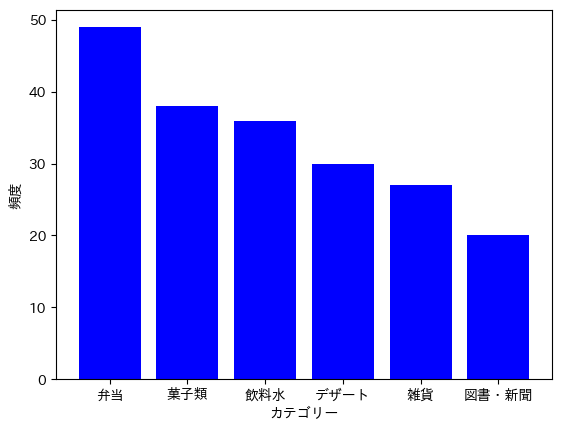

In [25]:
fig, ax = plt.subplots()

categories = count_category['カテゴリー']
frequencies = count_category['頻度']
x = range(len(categories))

ax.bar(x, frequencies, color='b')

ax.set_xlabel('カテゴリー')
ax.set_ylabel('頻度')
ax.set_xticks(x)
ax.set_xticklabels(categories)

plt.show()

In [26]:
sub_calc = df.groupby('商品番号')['注文数'].sum().reset_index()
sub_calc

,商品番号,注文数
0,1QJFO8QY,1128
1,2HSTCDWM,588
2,48XMJXKO,216
3,8T7D5DQA,528
4,MESUDVWQ,744
5,QRMOGNUU,894
6,S6RE8W6X,666
7,X0ZE2ZMY,306
8,YY4HAAZR,540
9,Z4WOOIYV,588


In [28]:
base_total = df.groupby('商品番号')['注文数'].describe()
base_total

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0
